## Comandos Linux
Comandos usados para extraer el dataset de Google Drive


In [ ]:
!unzip "/content/drive/My Drive/ava.zip" -d "/"

## Inicio del código de Python

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import numpy as np
import copy
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
mobilenet_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(256,256,3), weights=None)

In [ ]:
mobilenet_model.summary()

In [ ]:
model = Sequential()
model.add(mobilenet_model)
model.add(Flatten())
model.add(Dense(units=14, activation='softmax'))

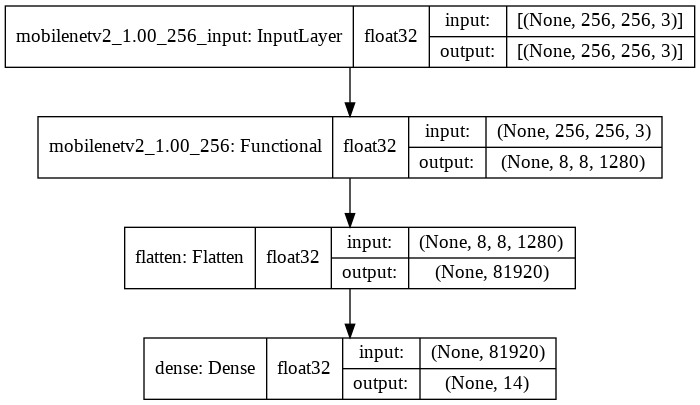

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_dtype=True,)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_256 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 81920)             0         
_________________________________________________________________
dense (Dense)                (None, 14)                1146894   
Total params: 3,404,878
Trainable params: 3,370,766
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
train_path = '/content/ava1/train'
valid_path = '/content/ava1/valid'
test_path = '/content/ava1/test'

In [ ]:
train_batches = ImageDataGenerator(rescale=1.0/255.0) \
                .flow_from_directory(directory=train_path, target_size=(256,256), batch_size=16)
valid_batches = ImageDataGenerator(rescale=1.0/255.0) \
                .flow_from_directory(directory=valid_path, target_size=(256,256), batch_size=16)
test_batches = ImageDataGenerator(rescale=1.0/255.0) \
                .flow_from_directory(directory=test_path, target_size=(256,256), batch_size=100, shuffle=False)

Found 9011 images belonging to 14 classes.
Found 1121 images belonging to 14 classes.
Found 1121 images belonging to 14 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 10 columns where
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

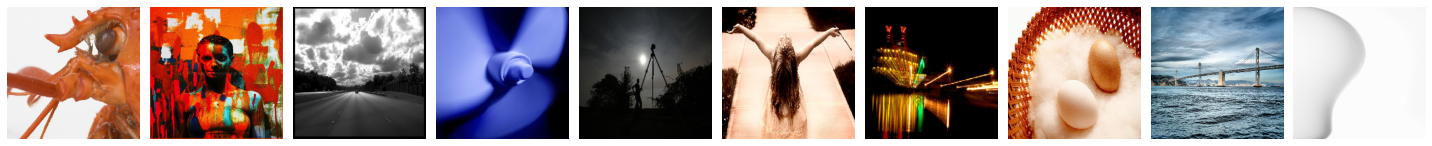

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0000065), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=12, verbose=1)

Epoch 1/12
349/564 [=================>............] - ETA: 33s - loss: 2.8364 - accuracy: 0.0986

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 211288080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131073 bytes but only got 10470. Skipping tag 582
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 196867 bytes but only got 10474. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 5. 
  warnings.warn(str(msg))


561/564 [============================>.] - ETA: 0s - loss: 2.8086 - accuracy: 0.1065

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11046 bytes but only got 749. Skipping tag 700
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 9664 bytes but only got 749. Skipping tag 34377
  " Skipping tag %s" % (size, len(data), tag)


564/564 [==============================] - 118s 173ms/step - loss: 2.8082 - accuracy: 0.1066 - val_loss: 2.6195 - val_accuracy: 0.0500
Epoch 2/12
564/564 [==============================] - 96s 169ms/step - loss: 2.6515 - accuracy: 0.1556 - val_loss: 2.6254 - val_accuracy: 0.0500
Epoch 3/12
564/564 [==============================] - 97s 171ms/step - loss: 2.5785 - accuracy: 0.1735 - val_loss: 2.6537 - val_accuracy: 0.0500
Epoch 4/12
564/564 [==============================] - 96s 171ms/step - loss: 2.5477 - accuracy: 0.1781 - val_loss: 2.6927 - val_accuracy: 0.0500
Epoch 5/12
564/564 [==============================] - 96s 170ms/step - loss: 2.4929 - accuracy: 0.1861 - val_loss: 2.7832 - val_accuracy: 0.0500
Epoch 6/12
564/564 [==============================] - 96s 171ms/step - loss: 2.4669 - accuracy: 0.1985 - val_loss: 2.7995 - val_accuracy: 0.0500
Epoch 7/12
564/564 [==============================] - 96s 170ms/step - loss: 2.4172 - accuracy: 0.2117 - val_loss: 2.8752 - val_accuracy: 0.

In [ ]:
model.save('ava_mobilenetv2_no_weights_14_0723.h5')

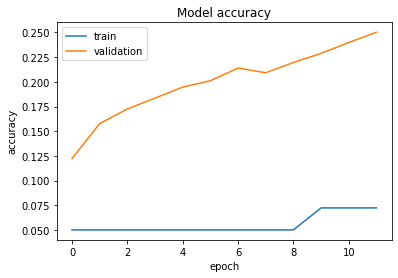

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('MobileNetV2 NO WEIGHTS.jpg')
plt.show()

In [ ]:
predictions = model.predict(x=test_batches, verbose=1)

12/12 [==============================] - 9s 675ms/step


In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

Y = label_binarize(test_batches.classes, [0,1,2,3,4,5,6,7,8,9,10,11,12,13])
n_classes = Y.shape[1]
avP = average_precision_score(y_true=Y, y_score=predictions) # Average none to see result per class
print(avP)
print(type(avP))
print(avP.size)
model.save('model_densenet201_55.h5')

0.12196184102250485
<class 'numpy.float64'>
1
